In [6]:
from preparation import do_the_job
data = do_the_job(path="data/data.csv")
X = data['input']
Y = data['output']

X.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,7.797546e-17,-3.315820e-14,-1.352495e-16,-1.024860e-14,0.224677,0.035350,...,0.334296,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335
std,10.42125,2.770014,186.910907,0.494901,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.417375,0.184665,...,0.471750,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512
min,17.00000,1.000000,0.000000,0.000000,-2.216433e+00,-2.374889e+00,-2.224953e+00,-2.815697e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.197935e+00,-8.649547e-01,-4.747909e-01,-9.402810e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,6.480923e-01,2.994571e-01,-2.803284e-01,3.316799e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,8.390606e-01,7.227225e-01,8.864466e-01,8.451701e-01,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,8.390606e-01,2.058168e+00,2.939106e+00,8.451701e-01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
positive = round(Y.sum()/len(Y) * 100)
negative = 100 - positive
print(f'True: {positive}%, Negative:{negative}%')

True: 11%, Negative:89%


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics
from utils import cv_zoom

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Gradient Boosting

## Gradient Boosting Classifier: precision score

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparamètres et nombre de folds pour la validation croisée
param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

gb = GradientBoostingClassifier(random_state=42)

scoring = 'precision'
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)
grid_search.fit(X_train, y_train)

# Les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

best_gb_precision = GradientBoostingClassifier(random_state=42, **best_params)
cv_zoom(model=best_gb_precision, X_train=X_train, y_train=y_train, num_folds=num_folds)

Meilleurs hyperparamètres :  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 25, 'subsample': 0.7}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.785 |        0.9 |      0.157
Fold 2:      0.726 |      0.898 |      0.151
Fold 3:      0.705 |      0.897 |       0.14
Fold 4:      0.718 |      0.897 |      0.137
Fold 5:      0.756 |      0.898 |      0.138


Testing check

In [5]:
best_gb_precision.fit(X_train, y_train)
y_pred = best_gb_precision.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.8025751072961373
F score : 0.23015384615384613


,True,False
Predicted True,187,46
Predicted False,1205,10919


## Gradient Boosting Classifier: f1 score without classs weights

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparamètres et nombre de folds pour la validation croisée
param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

gb = GradientBoostingClassifier(random_state=42)

scoring = 'f1'
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)
grid_search.fit(X_train, y_train)

# Les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)
best_gb = GradientBoostingClassifier(random_state=42, **best_params)

cv_zoom(model=best_gb, X_train=X_train, y_train=y_train, num_folds=num_folds)

Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 75, 'subsample': 0.3}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.513 |      0.889 |      0.272
Fold 2:      0.556 |      0.894 |      0.297
Fold 3:      0.463 |      0.883 |       0.26
Fold 4:      0.522 |       0.89 |      0.277
Fold 5:      0.477 |      0.884 |      0.258


Testing check

In [7]:
best_gb.fit(X_train, y_train)
y_pred = best_gb.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.5557046979865772
F score : 0.3874590547496491


,True,False
Predicted True,414,331
Predicted False,978,10634


# XGBoost

## Extreme Gradient Boosting Classifier: precision score without classs weights

In [8]:
import xgboost as xgb

param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

# from sklearn.metrics import f1_score
xgb_model = xgb.XGBClassifier(
    tree_method='exact',
    # eval_metric=f1_score
    #scale_pos_weight=np.sqrt(negative/positive) # donne plus de poids aux positives
)

scoring = 'precision'
clf = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

cv_zoom(model=clf.best_estimator_, X_train=X_train, y_train=y_train, num_folds=num_folds)
best_xgb_precision = clf.best_estimator_
best_xgb_precision.fit(X_train, y_train)

/home/theo/Documents/Cours/Dauphine/ml-python/.env/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


0.7526428833329785
{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 25, 'subsample': 0.3}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.803 |        0.9 |      0.145
Fold 2:      0.727 |      0.897 |      0.136
Fold 3:      0.702 |      0.896 |      0.131
Fold 4:      0.748 |      0.896 |      0.123
Fold 5:      0.773 |      0.899 |      0.142


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Testing check

In [9]:
y_pred = best_xgb_precision.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.7866666666666666
F score : 0.21892393320964748


,True,False
Predicted True,177,48
Predicted False,1215,10917


## Extreme Gradient Boosting Classifier: precision score with classs weights

In [10]:
import xgboost as xgb

param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

# from sklearn.metrics import f1_score
xgb_model = xgb.XGBClassifier(
    tree_method='exact',
    # eval_metric=f1_score
    scale_pos_weight=negative/positive # donne plus de poids aux positives
)

scoring = 'precision'
clf = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

cv_zoom(model=clf.best_estimator_, X_train=X_train, y_train=y_train, num_folds=num_folds)
best_xgb_precision_weights = clf.best_estimator_
best_xgb_precision_weights.fit(X_train, y_train)

0.4099899499566885
{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.5}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.418 |      0.862 |      0.574
Fold 2:      0.407 |      0.858 |      0.573
Fold 3:      0.397 |      0.855 |      0.556
Fold 4:      0.403 |      0.857 |      0.554
Fold 5:       0.39 |      0.853 |      0.535


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Testing check

In [11]:
y_pred = best_xgb_precision_weights.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.42139303482587065
F score : 0.49794238683127573


,True,False
Predicted True,847,1163
Predicted False,545,9802


## Extreme Gradient Boosting Classifier: f1 score without classs weights

In [12]:
import xgboost as xgb

param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

# from sklearn.metrics import f1_score
xgb_model = xgb.XGBClassifier(
    tree_method='exact',
    # eval_metric=f1_score
    #scale_pos_weight=np.sqrt(negative/positive) # donne plus de poids aux positives
)

scoring = 'f1'
clf = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

cv_zoom(model=clf.best_estimator_, X_train=X_train, y_train=y_train, num_folds=num_folds)
best_xgb_f1 = clf.best_estimator_
best_xgb_f1.fit(X_train, y_train)

0.376466656064533
{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 75, 'subsample': 0.5}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.546 |      0.893 |      0.282
Fold 2:      0.485 |      0.886 |      0.282
Fold 3:       0.48 |      0.885 |      0.273
Fold 4:      0.471 |      0.884 |      0.246
Fold 5:      0.459 |      0.882 |      0.258


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Testing check

In [13]:
y_pred = best_xgb_f1.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.551440329218107
F score : 0.37906647807637905


,True,False
Predicted True,402,327
Predicted False,990,10638


## Extreme Gradient Boosting Classifier: f1 score with classs weights

In [14]:
import xgboost as xgb

param_grid = {
    "max_depth": [4, 6, 8, 10],  # Largeur des arbres
    "n_estimators": [25, 50, 75, 100],  # Nombre d'arbres
    "subsample": [0.3, 0.5, 0.7],  # Ratio de sous-échantillonnage
    "learning_rate": [0.05, 0.1, 1]
}

# from sklearn.metrics import f1_score
xgb_model = xgb.XGBClassifier(
    tree_method='exact',
    # eval_metric=f1_score
    scale_pos_weight=negative/positive # donne plus de poids aux positives
)

scoring = 'f1'
clf = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

cv_zoom(model=clf.best_estimator_, X_train=X_train, y_train=y_train, num_folds=num_folds)
best_xgb_f1_weights = clf.best_estimator_
best_xgb_f1_weights.fit(X_train, y_train)

0.47519125492195924
{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 25, 'subsample': 0.7}
Fold  : precision  | accuracy   | recall    
Fold 1:      0.411 |      0.859 |      0.588
Fold 2:      0.428 |      0.865 |      0.596
Fold 3:      0.383 |      0.848 |      0.567
Fold 4:      0.409 |      0.859 |      0.565
Fold 5:      0.382 |      0.848 |      0.568


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Testing check

In [15]:
y_pred = best_xgb_f1.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
print(f"Précision : {precision}")
f1 = metrics.f1_score(y_test, y_pred)
print(f"F score : {f1}")

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
results = {
    'True': [tp, fn],
    'False': [fp, tn]
}
results = pd.DataFrame(results, index=['Predicted True', 'Predicted False'])
results

Précision : 0.551440329218107
F score : 0.37906647807637905


,True,False
Predicted True,402,327
Predicted False,990,10638


# ROC and AUC curves

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 25, 'subsample': 0.3}
best_gb_precision = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_precision.fit(X_train, y_train)

best_params = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 75, 'subsample': 0.3}
best_gb_f1 = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_f1.fit(X_train, y_train)

import xgboost as xgb

best_params = {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 25, 'subsample': 0.3}
best_xgb_precision = xgb.XGBClassifier(random_state=42, tree_method='exact', **best_params)
best_xgb_precision.fit(X_train, y_train)

best_params = {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.5}
best_xgb_precision_weights = xgb.XGBClassifier(random_state=42, tree_method='exact', scale_pos_weight=negative/positive , **best_params)
best_xgb_precision_weights.fit(X_train, y_train)

best_params = {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.5}
best_xgb_f1 = xgb.XGBClassifier(random_state=42, tree_method='exact', **best_params)
best_xgb_f1.fit(X_train, y_train)

best_params = {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 25, 'subsample': 0.7}
best_xgb_f1_weights = xgb.XGBClassifier(random_state=42, tree_method='exact', scale_pos_weight=negative/positive , **best_params)
best_xgb_f1_weights.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

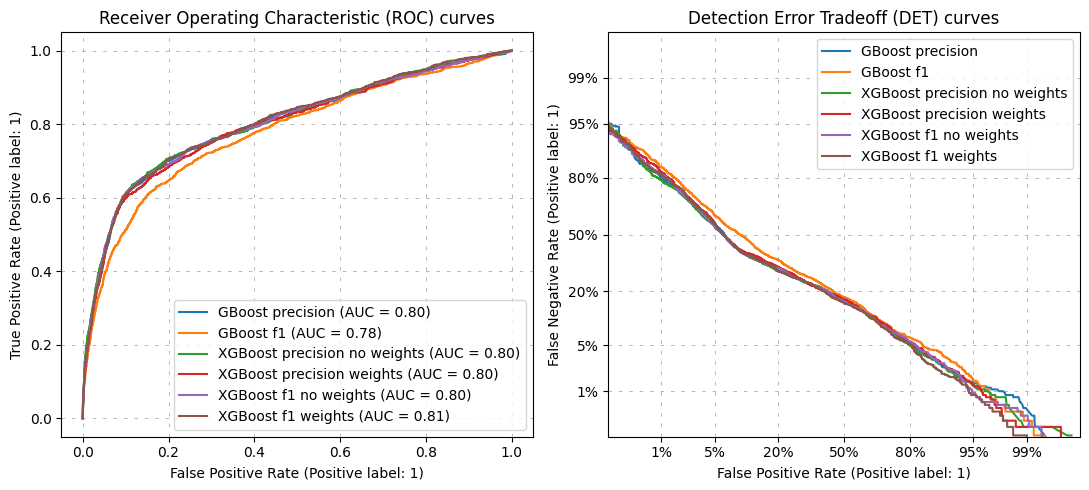

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

classifiers = {
    "GBoost precision": best_gb_precision,
    "GBoost f1": best_gb_f1,
    "XGBoost precision no weights": best_xgb_precision, 
    "XGBoost precision weights": best_xgb_precision_weights, 
    "XGBoost f1 no weights": best_xgb_f1, 
    "XGBoost f1 weights": best_xgb_f1_weights, 
}

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color='gray', linewidth=0.5, alpha=0.8)
ax_det.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color='gray', linewidth=0.5, alpha=0.8)

# ax_roc.legend(fontsize='small')
# ax_det.legend(fontsize='small')

plt.legend()
plt.tight_layout()
plt.show()

Post-tuning the decision threshold for cost-sensitive learning:

Once a classifier is trained, the output of the predict method outputs class label predictions corresponding to a thresholding of either the decision_function or the predict_proba output. For a binary classifier, the default threshold is defined as a posterior probability estimate of 0.5 or a decision score of 0.0.

However, this default strategy is most likely not optimal for the task at hand. Here, we use the “Statlog” German credit dataset [1] to illustrate a use case. In this dataset, the task is to predict whether a person has a “good” or “bad” credit. In addition, a cost-matrix is provided that specifies the cost of misclassification. Specifically, misclassifying a “bad” credit as “good” is five times more costly on average than misclassifying a “good” credit as “bad”.

We use the TunedThresholdClassifierCV to select the cut-off point of the decision function that minimizes the provided business cost.

In [59]:
def business_metric(y_true, y_pred, benefit=100, cost=20, missed_opportunity=50):
    """
    Métrique personnalisée basée sur les bénéfices et coûts.

    Args:
     - y_true : np.array
        Les vraies étiquettes (0 ou 1).
     - y_pred_proba : np.array
        Les probabilités prédites par le modèle pour la classe positive.
     - benefit : float
        Le gain pour une prédiction correcte d'un vrai positif (TP).
     - cost : float
        Le coût d'un faux positif (FP).
     - missed_opportunity : float
        Le coût d'une opportunité manquée pour un faux négatif (FN).

    Returns:
    float
        La valeur nette ajustée.
    """
    
    # Calculer les métriques de confusion
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    # Calculer la valeur nette ajustée
    net_value = (tp * benefit) - (fp * cost) - (fn * missed_opportunity)
    return net_value

# Fonction pour calculer business_metric à un seuil donné
def calculate_business_metric(model, X_test, y_test, thresholds):
    scores = []
    for threshold in thresholds:
        y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
        score = business_metric(y_test, y_pred)
        scores.append(score)
    return scores


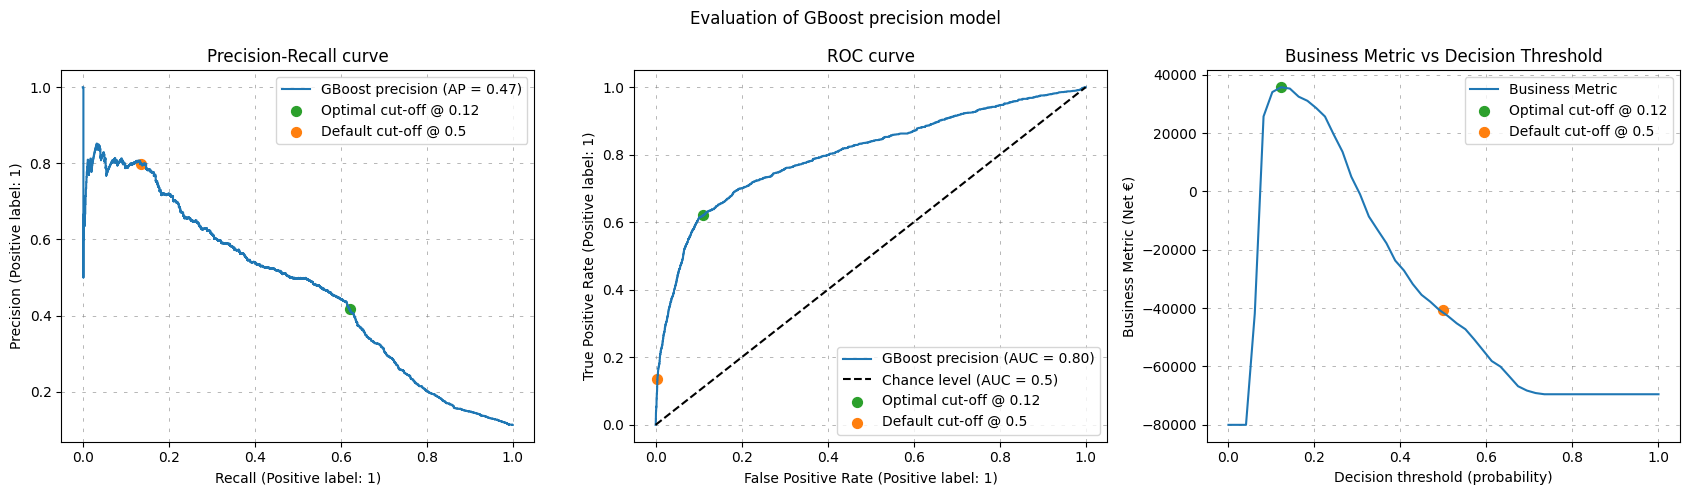

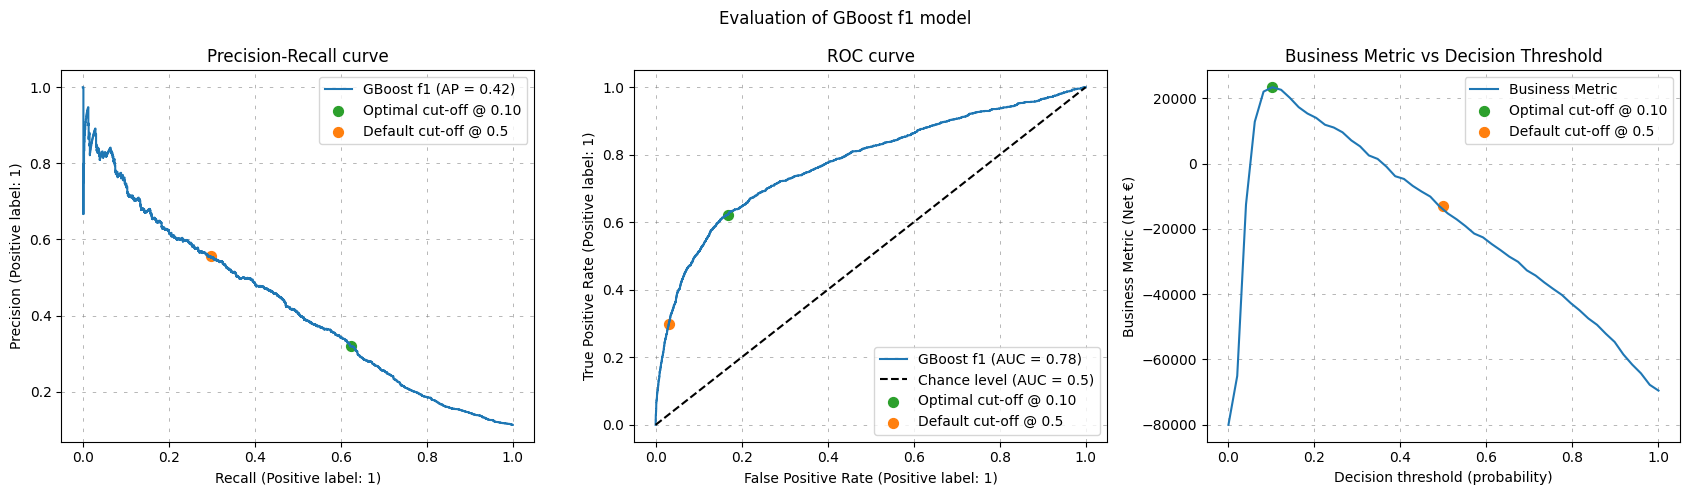

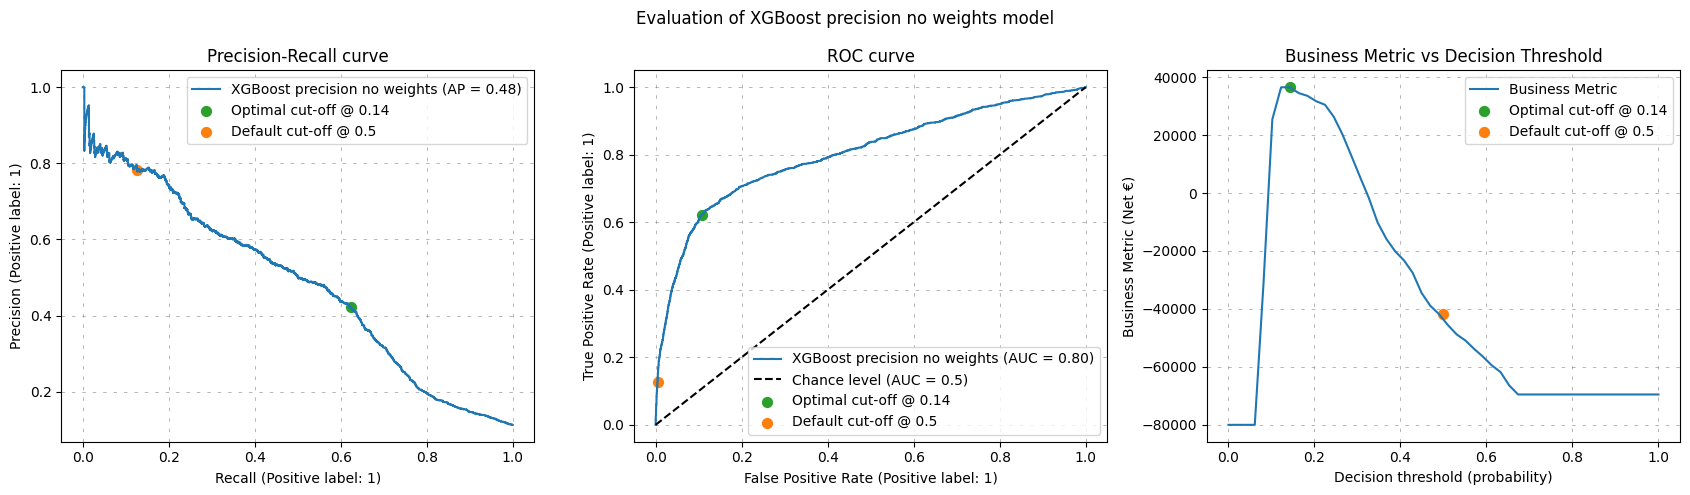

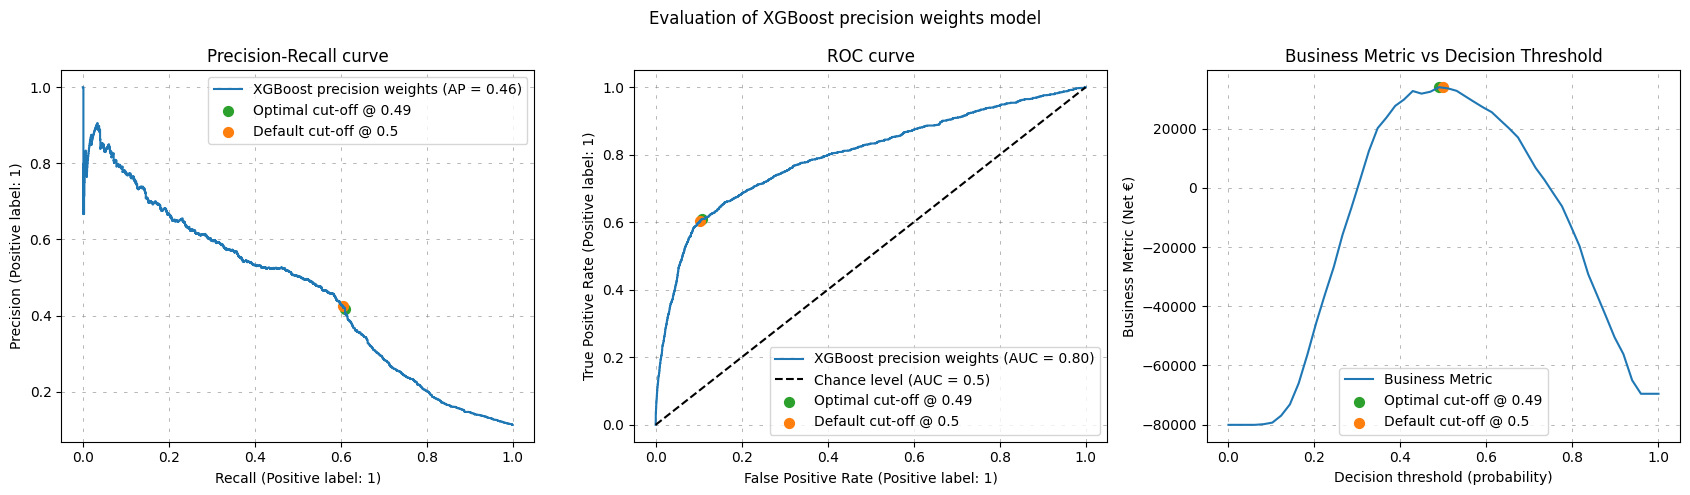

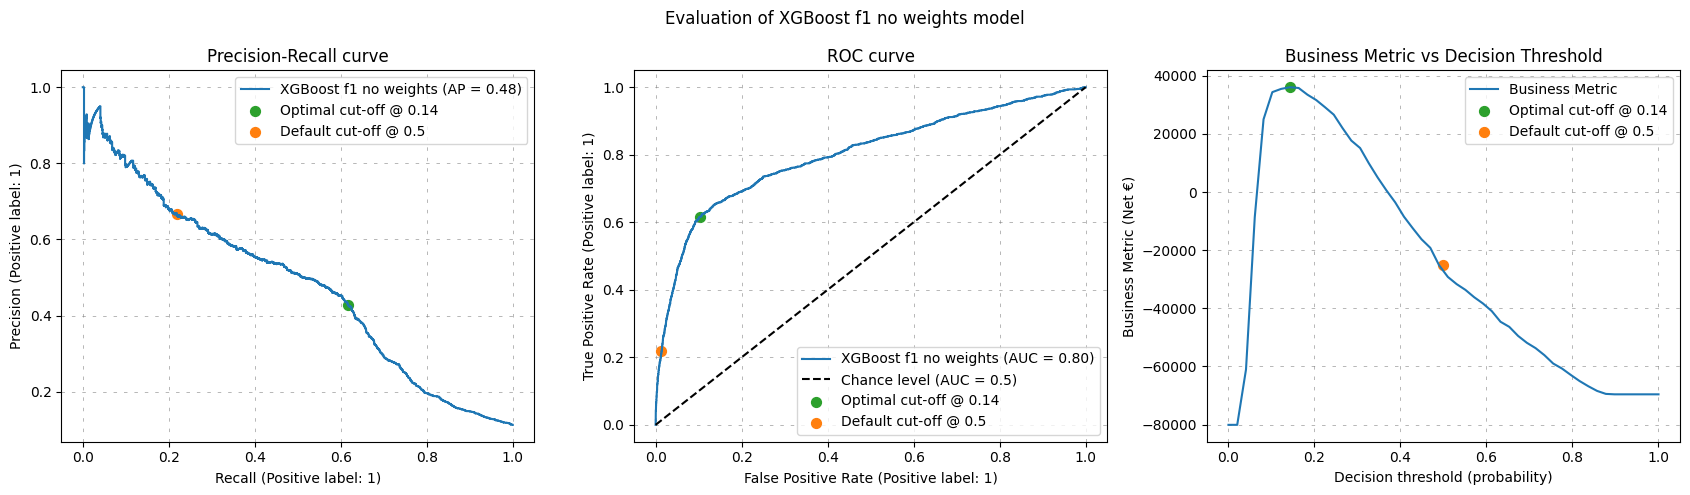

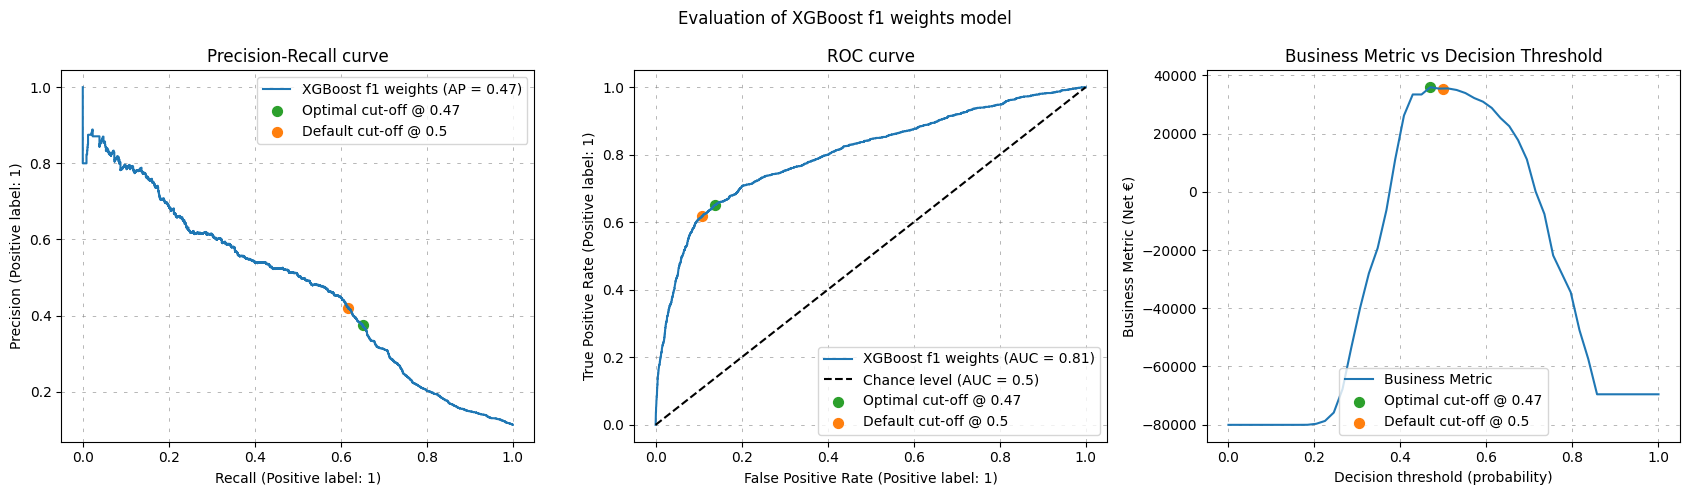

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

def calculate_business_metric(model, X_test, y_test, thresholds, benefit=100, cost=20, missed_opportunity=50):
    scores = []
    for threshold in thresholds:
        y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
        score = business_metric(y_test, y_pred, benefit=benefit, cost=cost, missed_opportunity=missed_opportunity)
        scores.append(score)
    return scores

for name, model in classifiers.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0.0, 1.0, 50)
    
    # Calcul de la business metric et de l'optimal threshold
    business_scores = calculate_business_metric(model, X_test, y_test, thresholds)
    optimal_idx = np.argmax(business_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    # Seuil par défaut
    default_threshold = 0.5
    default_precision = metrics.precision_score(y_test, (y_pred_proba >= default_threshold).astype(int))
    default_recall = metrics.recall_score(y_test, (y_pred_proba >= default_threshold).astype(int))

    # Création des graphiques
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

    # Precision-Recall curve
    PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, ax=axs[0], name=name
    )
    # Point optimal
    axs[0].scatter(
        recall := metrics.recall_score(y_test, (y_pred_proba >= optimal_threshold).astype(int)),
        precision := metrics.precision_score(y_test, (y_pred_proba >= optimal_threshold).astype(int)),
        color="tab:green",
        s=50,
        label=f"Optimal cut-off @ {optimal_threshold:.2f}",
    )
    # Point par défaut
    axs[0].scatter(
        default_recall,
        default_precision,
        color="tab:orange",
        s=50,
        label="Default cut-off @ 0.5",
    )
    axs[0].set_title("Precision-Recall curve")
    axs[0].legend()

    # ROC curve
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        ax=axs[1],
        name=name,
        plot_chance_level=True,
    )
    fpr, tpr, roc_thresholds = metrics.roc_curve(y_test, y_pred_proba)
    optimal_fpr = fpr[np.abs(roc_thresholds - optimal_threshold).argmin()]
    optimal_tpr = tpr[np.abs(roc_thresholds - optimal_threshold).argmin()]
    default_fpr = fpr[np.abs(roc_thresholds - default_threshold).argmin()]
    default_tpr = tpr[np.abs(roc_thresholds - default_threshold).argmin()]
    # Point optimal
    axs[1].scatter(
        optimal_fpr,
        optimal_tpr,
        color="tab:green",
        s=50,
        label=f"Optimal cut-off @ {optimal_threshold:.2f}",
    )
    # Point par défaut
    axs[1].scatter(
        default_fpr,
        default_tpr,
        color="tab:orange",
        s=50,
        label="Default cut-off @ 0.5",
    )
    axs[1].set_title("ROC curve")
    axs[1].legend()

    # Business metric curve
    axs[2].plot(
        thresholds,
        business_scores,
        color="tab:blue",
        label="Business Metric",
    )
    axs[2].scatter(
        optimal_threshold,
        business_scores[optimal_idx],
        color="tab:green",
        s=50,
        label=f"Optimal cut-off @ {optimal_threshold:.2f}",
    )
    default_idx = np.abs(thresholds - default_threshold).argmin()
    axs[2].scatter(
        default_threshold,
        business_scores[default_idx],
        color="tab:orange",
        s=50,
        label="Default cut-off @ 0.5",
    )
    axs[2].legend()
    axs[2].set_xlabel("Decision threshold (probability)")
    axs[2].set_ylabel("Business Metric (Net €)")
    axs[2].set_title("Business Metric vs Decision Threshold")

    # Ajouter des grilles aux graphiques
    for ax in axs:
        ax.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color='gray', linewidth=0.5, alpha=0.8)

    # Finaliser le layout
    _ = fig.suptitle(f"Evaluation of {name} model")
    plt.tight_layout()
    plt.savefig(f'plots/{name}.pdf')
    plt.show()
